In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\ASUS\anaconda3\envs\python_primary\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

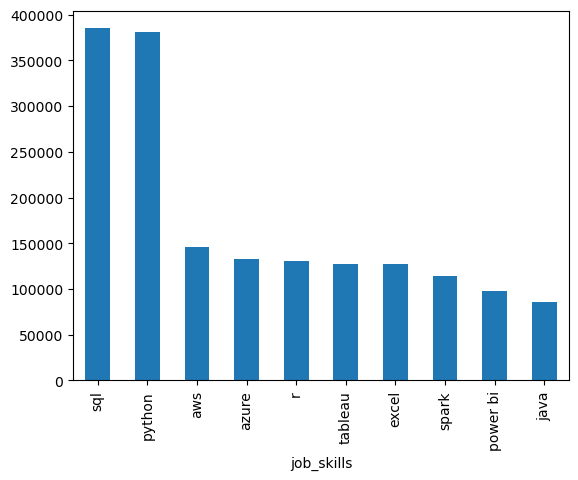

In [ ]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [16]:
skill_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()
skill_count

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [20]:
df_skill_count = skill_count.reset_index(name='skill_count')
df_skill_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skill_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [31]:
job_title = 'Data Scientist'
top_skills = 15

df_skills_final = df_skill_count[df_skill_count['job_title_short'] == job_title].head(top_skills)
df_skills_final

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
1101,Data Scientist,sql,78982
1070,Data Scientist,r,59566
1082,Data Scientist,sas,29534
1113,Data Scientist,tableau,29445
924,Data Scientist,aws,26256
1096,Data Scientist,spark,24286
925,Data Scientist,azure,21664
1114,Data Scientist,tensorflow,19153
968,Data Scientist,excel,17545


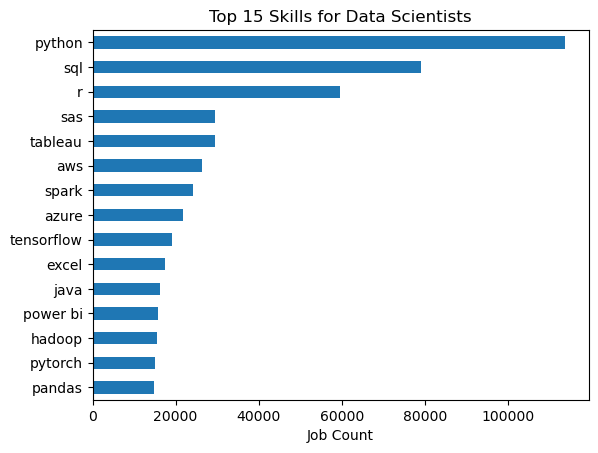

In [34]:
df_skills_final.plot(x='job_skills', y='skill_count', kind='barh')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} Skills for {job_title}s')
plt.xlabel('Job Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()